# Proyecto Final
## Data Science I: Fundamentos para la Ciencia de Datos
### Fecha: 16-07-20204
### Nombre archivo: `TMDB_tv_dataset_v3.csv`
#### source: https://www.kaggle.com/datasets/asaniczka/full-tmdb-tv-shows-dataset-2023-150k-shows?resource=download


## Objetivos
- Elegir un método de feature selection para reducir la dimensionalidad del dataset.
- Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.
- Validar modelo a traves de la metricas basicas. 
- Generar conclusiones con base en los resultados obtenidos.

## Metadata 
El conjunto de datos proporciona información crucial para analizar las tendencias y predecir el éxito de películas y shows de televisión utilizando información de The Movie Database (TMDB). La base de datos esta compuesta por 29 variables y mas de 150000 registros, los cuales incluyen atributos interesantes de analisis como el genero, popularidad y fecha de emision, permitiendo la segmentación y análisis detallado. Esta cantidad de datos permite una comprensión profunda y detallada de las preferencias y comportamientos de la audiencia.

Los análisis derivados de este dataset presentan una oportunidad valiosa para la industria del entretenimiento, permitiendo la identificación de factores que impulsan la popularidad, la evaluación de la efectividad de estrategias de lanzamiento y marketing, y la formulación de recomendaciones personalizadas para los usuarios, por mencionar algunos.

Este conjunto de datos es una herramienta invaluable para investigadores y profesionales de la industria del entretenimiento, contribuyendo a la mejora de la toma de decisiones estratégicas, la personalización de la experiencia del usuario y el incremento de la satisfacción y retención de la audiencia. 

##  Variables
id: id unico del show
 <br> name: nombre del show
 <br> number_of_seasons: numero de temporadas
 <br> number_of_episodes: numero de episodios 
 <br> original_language: idioma original
 <br> vote_count: cantidad de votos, 0 indica sin informacion
 <br> vote_average: nota promedio de los votos, 0 indica sin informacion
 <br> overview: resumen
 <br> adult: boolean que indica si el show es categoria adulto
 <br> backdrop_path: url para la imagen del show
 <br> first_air_date: primera fecha de emision
 <br> last_air_date: ultima fecha de emision 
 <br> homepage: url oficial del show
 <br> in_production: boolean que indica si esta en producion
 <br> original_name: nombre original 
 <br> popularity: popularidad, 0 indica sin informacion
 <br> poster_path: url para la imagen del poster
 <br> type: tipo de show
 <br> status: status 
 <br> tagline: linea asociada al show
 <br> genres: listado de genero
 <br> created_by: creado por
 <br> languages:listado idiomas disponibles
 <br> networks: listado de cadenas que han emitido el programa 
 <br> origin_country: listado de pais/es de origen
 <br> spoken_languages: listado de idiomas hablados 
 <br> production_companies: listado de compañias productoras
 <br> production_countries:listado de los paises de produccion
 <br> episode_run_time: duracion de los episodios, 0 indica no informacion

# Carga de datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, AutoDateLocator,AutoDateFormatter,YearLocator
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [5]:
tmdb=pd.read_csv("../data/TMDB_tv_dataset_v3.csv")

# Análisis exploratorio de datos (EDA)
A continuacion se entregara un resumen de los puntos mas importantes obtenido en el EDA, si se desea ver en mayor detalle puede consultar el notebook ProyectoDS_ParteI_jofre.ipynb

### Renomabramiento de vaiables

In [6]:
nombres_columnas= {'id':"id",
'name':"Nombre_Serie",
'number_of_seasons':"num_Temporadas",
'number_of_episodes':"num_Episodios",
'original_language':"Idioma_original",
'vote_count':"Votos_Totales",
'vote_average':"Voto_promedio",
'overview':"Resumen",
'adult':"Categoria_Adulto",
'backdrop_path':"url_Imagen",
'first_air_date':"Fecha_Inicio",
'last_air_date':"Fecha_Fin",
'homepage':"Pagina",
'in_production':"En_Produccion",
'original_name':"Nombre_Original",
'popularity':"Popularidad",
'poster_path':"url_Poster",
'type':"Tipo_Show",
'status':"Status",
'tagline':"Frase",
'genres':"Generos",
'created_by':"Creador",
'languages':"Idiomas",
'networks':"Canales",
'origin_country':"Pais_Origen",
'spoken_languages':"Idiomas_hablados",
'production_companies':"Companias_Produccion",
'production_countries':"Paises_Produccion",
'episode_run_time':"Duracion_episodio"}

tmdb.rename(columns=nombres_columnas,inplace=True)

### Tratamiento de valores nulos
- Para la columna de generos, se rellena la columna con el valor "Sin información"
- Se eliminan las columnas que tienen soobre un 35% de valores nulos, que no entregan informacion relevante, como url de la imagen del poster. 
- Se eliminan las filas que no poseen valores de las fechas de inicio o final.
- Aún con esto se posee una base con sobre 90 mil filas de información.  

In [7]:
tmdb=tmdb.dropna(subset=['Nombre_Serie'])
tmdb['Generos']=tmdb['Generos'].fillna('sin informacion')
tmdb=tmdb.drop(columns=['Nombre_Serie','Resumen','url_Imagen','url_Poster','Frase','Pagina','Creador'])
tmdb=tmdb.dropna(subset=['Fecha_Inicio','Fecha_Fin','Idiomas' ])
tmdb.shape


(98775, 22)

### Columna calculadas y transformaciòn de categorias
Para obtener un mejor detalle se extrae informacion temporal de las fechas, como el mes de ingreso y la estacion del año.

In [8]:
tmdb['Fecha_Inicio']= pd.to_datetime(tmdb['Fecha_Inicio'])
tmdb['Mes']= tmdb['Fecha_Inicio'].dt.month
tmdb['estacion']=tmdb['Mes']%4
tmdb['estacion_n']= tmdb['estacion'].map({0:'primavera',1:'verano',2:'otoño',3:'invierno'})
tmdb['scripted']=tmdb['Generos'].apply(lambda x: 1 if x=='Scripted' else 0)
tmdb['anho']= tmdb['Fecha_Inicio'].dt.year

Ademas dado que el tipo de programa esta desbalanceado a los del tipo script se crea una nueva variable que indica si el programa es del tipo scripted o no.

In [9]:
tmdb['scripted']=tmdb['Generos'].apply(lambda x: 1 if x=='Scripted' else 0)

De manera similar la categoria de status se separa en 2 categorias, si finalizo o es una serie que regresa.

In [10]:
tmdb['finalizado']=tmdb['Status'].apply(lambda x: 1 if x=='Ended' else 0)
tmdb['retorno']=tmdb['Status'].apply(lambda x: 1 if x=='Returning Series' else 0)

Por ultimo se agrega una columna indicando cuantos generos utilizo el programa.

In [11]:
def contar_generos (genero):
    if genero=='sin informacion':
        return 0
    else:
        return genero.count(',')+1
tmdb['num_genero']= tmdb['Generos'].apply(contar_generos)
tmdb['num_idioma']=(tmdb['Idiomas'].apply(contar_generos))
tmdb=tmdb.reset_index()

## Graficos 
En esta sección, presentamos los gráficos relevantes que ilustran el análisis de los datos recopilados. 

In [12]:
show_verano=tmdb[tmdb['estacion']==1]['Generos'].dropna()
show_otono=tmdb[tmdb['estacion']==2]['Generos'].dropna()
show_invierno=tmdb[tmdb['estacion']==3]['Generos'].dropna()
show_primavera=tmdb[tmdb['estacion']==0]['Generos'].dropna()
all_genres_verano =show_verano.str.split(',').explode().str.strip()
all_genres_verano=all_genres_verano.to_frame().reset_index(drop=True)
all_genres_otono =show_otono.str.split(',').explode().str.strip()
all_genres_otono=all_genres_otono.to_frame().reset_index(drop=True)
all_genres_invierno =show_invierno.str.split(',').explode().str.strip()
all_genres_invierno=all_genres_invierno.to_frame().reset_index(drop=True)
all_genres_primavera =show_primavera.str.split(',').explode().str.strip()
all_genres_primavera=all_genres_primavera.to_frame().reset_index(drop=True)


<function matplotlib.pyplot.show(close=None, block=None)>

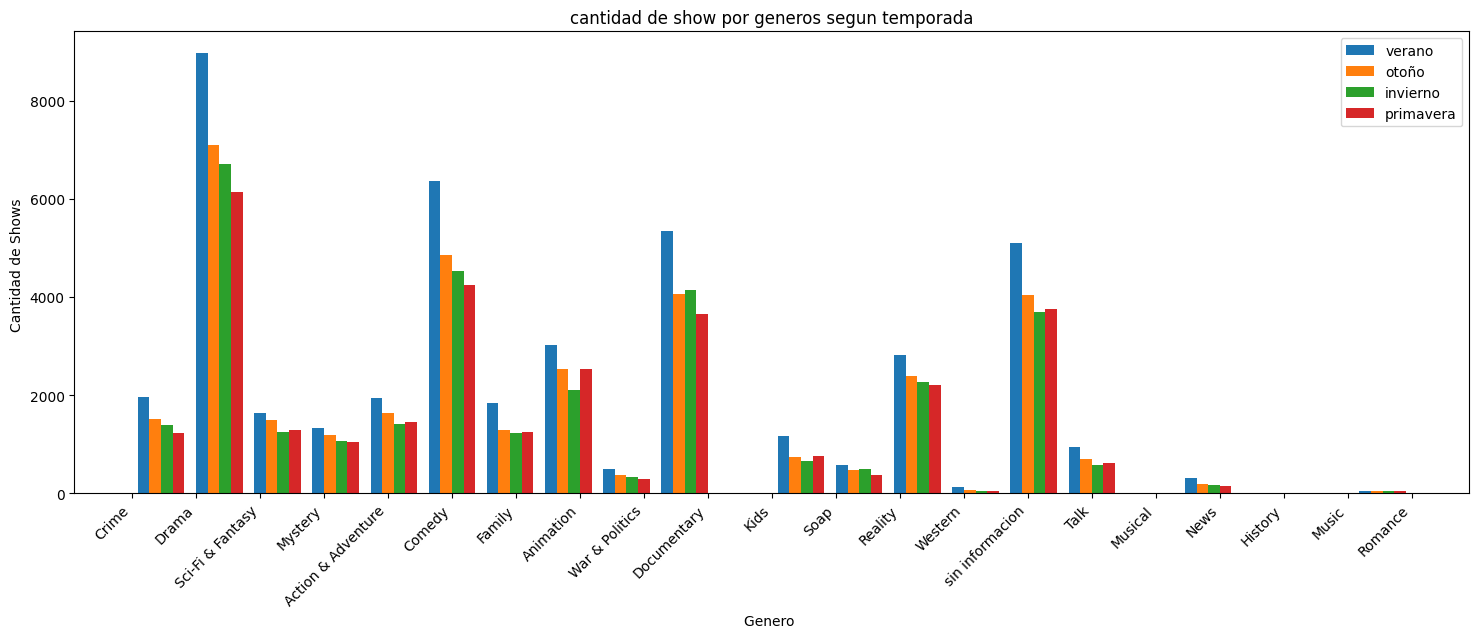

In [13]:

plt.figure(figsize=(18, 6))
plt.hist([all_genres_verano["Generos"],all_genres_otono["Generos"],all_genres_invierno["Generos"],all_genres_primavera["Generos"]],label=["verano","otoño","invierno","primavera"],bins=22)
plt.xlabel('Genero ')
plt.ylabel('Cantidad de Shows ')
plt.title('cantidad de show por generos segun temporada')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show

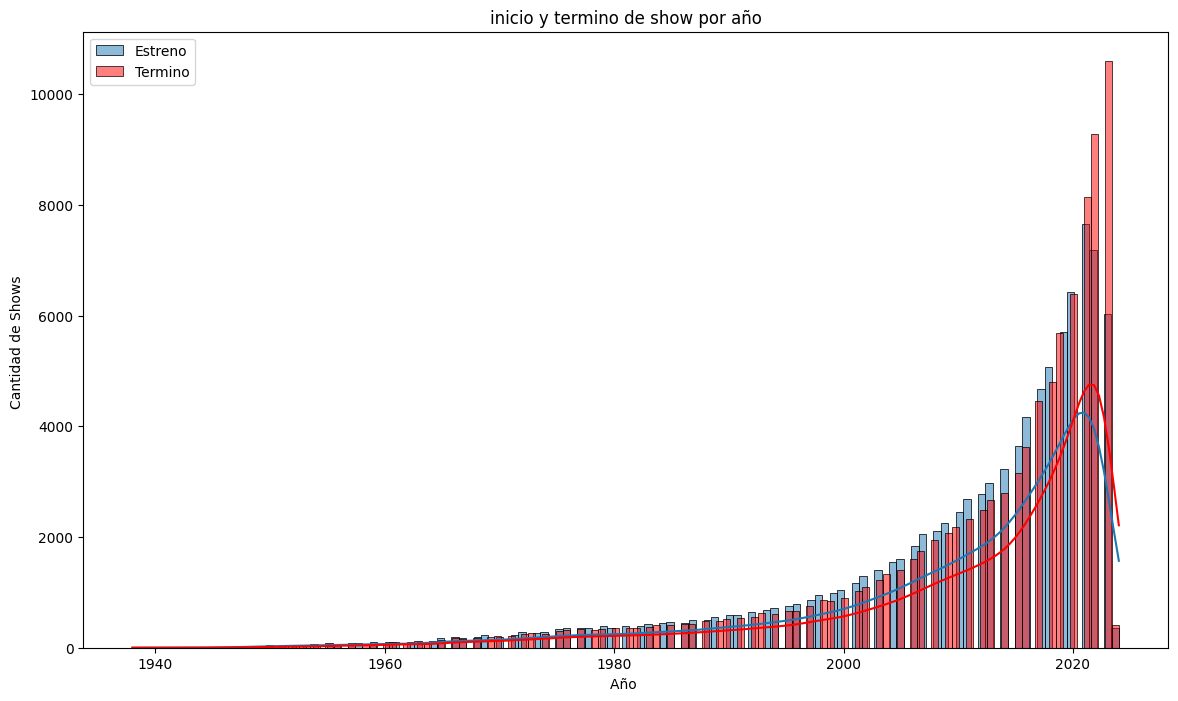

In [14]:
tmdb_fin=tmdb.dropna(subset=['Fecha_Fin'])
tmdb_fin['Fecha_Fin']=pd.to_datetime(tmdb_fin['Fecha_Fin'])
tmdb_fin['año']=tmdb_fin['Fecha_Fin'].dt.year
tmdb_fin['mes']=tmdb_fin['Fecha_Fin'].dt.strftime('%b')
tmdb_fin['anhomes']=tmdb_fin['Fecha_Fin'].dt.to_period('M')
tmdb_inicio=tmdb.dropna(subset=['Fecha_Inicio'])
tmdb_inicio['Fecha_Inicio']=pd.to_datetime(tmdb_inicio['Fecha_Inicio'])
tmdb_inicio['año']=tmdb_inicio['Fecha_Inicio'].dt.year
tmdb_inicio['mes']=tmdb_inicio['Fecha_Inicio'].dt.strftime('%b')
tmdb_inicio['anhomes']=tmdb_inicio['Fecha_Inicio'].dt.to_period('M')

plt.figure(figsize=(14, 8))
sns.histplot(x='año', data=tmdb_inicio,label="Estreno", kde=True)
sns.histplot(x='año', data=tmdb_fin, color="red",label="Termino", kde=True)
plt.xlabel('Año ')
plt.ylabel('Cantidad de Shows ')
plt.title('inicio y termino de show por año')
plt.legend() 

plt.show()

## 

## Reduccion de dimensionalidad

Para poder utilizar tanto la reduccion de dimensionalidad como la regresion, es necesario normalizar los datos para los valores numericos.

In [15]:
numeric_features =["num_Temporadas","num_Episodios","Votos_Totales","Voto_promedio","Popularidad","Duracion_episodio","Mes","scripted","anho","num_genero","num_idioma"]
X = tmdb[numeric_features]
y = tmdb['Popularidad']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=numeric_features)
tmdb[numeric_features]=df_normalized

A continuacion se hace el featured selection eliminandos las columnas que no entregan informacion o la informacion esta representada en otras columna como las fechas de emision y el estado del programa.
El metodo escogido es el SelectKBest de la biblioteca sklearn.

In [16]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression, k=5)
Y=tmdb['Popularidad']

X=tmdb.drop(columns=['Popularidad','index','id','Idioma_original','Companias_Produccion','Paises_Produccion','Fecha_Inicio','Fecha_Fin','Nombre_Original','Tipo_Show','Generos','Pais_Origen','Idiomas_hablados','estacion_n','Idiomas','Canales','Status'])
fs.fit(X,Y)
for i in range(len(fs.scores_)):

 print(X.columns.values[i]+' %d: %f' % (i, fs.scores_[i]))

num_Temporadas 0: 3481.791059
num_Episodios 1: 13199.421658
Votos_Totales 2: 4760.217475
Voto_promedio 3: 1103.420108
Categoria_Adulto 4: 46.261259
En_Produccion 5: 17.584759
Duracion_episodio 6: 14.171136
Mes 7: 7.081427
estacion 8: 0.156226
scripted 9: 0.000000
anho 10: 237.001725
finalizado 11: 28.188095
retorno 12: 23.349700
num_genero 13: 951.474631
num_idioma 14: 8.159504


## Machine Learning 
- Se espera obtener un modelo para predecir la popularidad de los nuevos programas, para esto se realizara una regresion lineal multiple utilizando los 5 mejores resultados obtenidos del featured selection:<br> numero de episodios, votos totales, num_temporadas, voto promedio y numeros de generos.


In [20]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sma
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
tmdb_train= pd.concat([X_train,y_train],axis=1)
model1 = 'Popularidad~Votos_Totales+Voto_promedio+num_Temporadas+num_Episodios+num_genero'
lm1   = sma.ols(formula = model1, data = tmdb_train).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:            Popularidad   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3119.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:31:18   Log-Likelihood:                -96363.
No. Observations:               74081   AIC:                         1.927e+05
Df Residuals:                   74075   BIC:                         1.928e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0010      0.003     -0.

Se observa del modelo obtenido que el modelo seria el siguiente (los valores de los coeficientes podrian variar ya que la separacion de los datos de prueba esta siendo realizada de manera aleatoria cada vez que se ejecuta el codigo): <br>
- Popularidad= Votos_totales* 0.1922 + Voto_Promedio* 0.0482 +num_Temporadas* 0.0375+num_Episodios *0.3172 +num_genero*0.0481 <br>

De esto se puede discutir lo siguiente:
- Todos los coeficientes son positivos, la funcion indica que el programa sera mas popular mientras mayor tiempo de emision posea, obtengas mayores votos y posea varios generos a la vez. 
- para el caso de votos y episodios podria ser una concecuencia y no una causa, ya que mientras mas popular el programa mayor probabilidad de que genere ganacias ya que los espectadores estaran mas motivados a comprar mercancia del programa, esto a su vez motiva a la productora a mantener el show en emision, lo que pasa de manera similar con los votos mientras mas popular mas conocido por lo uqe tiene mayor posibilidad de ser reconocido en encuestas.
- Por ultimo es necesario hablar del numero de generos el cual se puede considerar que no es afectado por la popularidad ya que este es definido previo a la emision del programa, por lo que es una causa de la popularidad.
- El numero de gnero indicarias que mientras mayor mejor popularidad tendria pero esto no significa que si agregamos generos de manera aleatoria obtendremos un mejor resultado, esto a que podria llegar a obtenerse una hiistoria demasiada compleja dificultando llegar a una mayor audiencia o que existan combinaciones de generos que se afecten de manera negaticva.

## Metricas 
Como metrica para validar el modelo se usara el ems ya que se esta evaluando un modelo de regresión. 

In [51]:
from sklearn.metrics import mean_squared_error
Y_mod=lm1.predict(X_test)
mean_squared_error(Y_mod,y_test)

0.9668586797031143

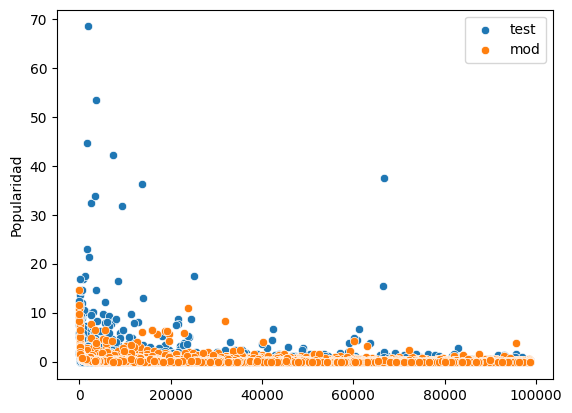

In [45]:

plt.figure()
ax=sns.scatterplot(y_test)
bx=sns.scatterplot(Y_mod)
ax.legend(['test','modelo'])
plt.title()
plt.show()

## Conclusiones 

- se obtiene un modelo con un R cuadrad de 0.96 por lo que se puede considerar que el modelo puede ayudar a predecir el comportamiento de la popularidad.

- Aunque se encuentra que existe una relacion entre las variables escogidas y la popularidad, solo logran representar un pequeño % de los datos indicado por el R-squared obtenido al realizar el modelo. Se obtiene que existe una relacion positiva entre la cantidad de generos utilizados y la popularidad. 

- Se deben realizar mas estudios para mejorar el modelo, en primer lugar investigar mas sobre la medida de popularidad y posibles caracteristicas que utilice y no se encuentren en la base original, en segundo seria valioso hacer un estudio en relacion a los generos de los show para encontrar las combinaciones que se potencian entre ellas.  
